## Igår: 
setup - repo, folderstruktur, installationer (numpy, pandas, seaborn, matplotlib, openpyxl, ipykernel) 
- Pandas och Seaborn
- Series object
- DataFrame object
- Index object
- Selections, filtering, masking, rename, sorting ...
- Summativa beskrivningar av data -> info(), describe(), unique(), head(), tail()
- Visualiserar mha Seaborn

---
# Lecture notes - Pandas - missing data & aggregations

---
This is the lecture note for **Pandas missing data & aggregations** - but it's built upon contents from previous course: 
- Python programming

Read more 

- [documentation - read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

- [documentation - aggregate](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html)

- [documentation - groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

- [documentation - missing values](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)
---

## Setup
- create dummy DataFrame
- it's very useful to create dummy DataFrame in order to test and learn Pandas methods

In [39]:
import numpy as np 
import pandas as pd
np.random.seed(42)

n = 10
random_matrix = np.random.randint(1,10, (n,n))
#It returns an array of specified shape and fills it with random integers from low (inclusive) to high (exclusive), i.e. in the interval [low, high).
print(random_matrix)
index = np.random.choice(random_matrix.size, 10, replace = False)
#random.choice(a, size=None, replace=True, p=None). Generates a random sample from a given 1-D array: a
print(f"index {index}")
print(f"Flattens the matrix: {random_matrix.ravel()}")

random_matrix = random_matrix*1.0 # to convert it to float as np.nan is float
random_matrix.ravel()[index] = None # returns contiguous flattened array
# numeric containers always use NaN 
print(random_matrix)

[[7 4 8 5 7 3 7 8 5 4]
 [8 8 3 6 5 2 8 6 2 5]
 [1 6 9 1 3 7 4 9 3 5]
 [3 7 5 9 7 2 4 9 2 9]
 [5 2 4 7 8 3 1 4 2 8]
 [4 2 6 6 4 6 2 2 4 8]
 [7 9 8 5 2 5 8 9 9 1]
 [9 7 9 8 1 8 8 3 1 8]
 [3 3 1 5 7 9 7 9 8 2]
 [1 7 7 8 5 3 8 6 3 1]]
index [ 9 84  6 39 92 33 68 85 20 17]
Flattens the matrix: [7 4 8 5 7 3 7 8 5 4 8 8 3 6 5 2 8 6 2 5 1 6 9 1 3 7 4 9 3 5 3 7 5 9 7 2 4
 9 2 9 5 2 4 7 8 3 1 4 2 8 4 2 6 6 4 6 2 2 4 8 7 9 8 5 2 5 8 9 9 1 9 7 9 8
 1 8 8 3 1 8 3 3 1 5 7 9 7 9 8 2 1 7 7 8 5 3 8 6 3 1]
[[ 7.  4.  8.  5.  7.  3. nan  8.  5. nan]
 [ 8.  8.  3.  6.  5.  2.  8. nan  2.  5.]
 [nan  6.  9.  1.  3.  7.  4.  9.  3.  5.]
 [ 3.  7.  5. nan  7.  2.  4.  9.  2. nan]
 [ 5.  2.  4.  7.  8.  3.  1.  4.  2.  8.]
 [ 4.  2.  6.  6.  4.  6.  2.  2.  4.  8.]
 [ 7.  9.  8.  5.  2.  5.  8.  9. nan  1.]
 [ 9.  7.  9.  8.  1.  8.  8.  3.  1.  8.]
 [ 3.  3.  1.  5. nan nan  7.  9.  8.  2.]
 [ 1.  7. nan  8.  5.  3.  8.  6.  3.  1.]]


In [40]:
scores = pd.DataFrame(random_matrix,
                      index=[f"Player {i}" for i in range(1, n+1)],
                      columns=[f"Round {i}" for i in range(1,n+1)]
                      )
scores.head()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player 1,7.0,4.0,8.0,5.0,7.0,3.0,NaN,8.0,5.0,NaN
Player 2,8.0,8.0,3.0,6.0,5.0,2.0,8.0,NaN,2.0,5.0
Player 3,NaN,6.0,9.0,1.0,3.0,7.0,4.0,9.0,3.0,5.0
Player 4,3.0,7.0,5.0,NaN,7.0,2.0,4.0,9.0,2.0,NaN
Player 5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0


In [41]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Player 1 to Player 10
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Round 1   9 non-null      float64
 1   Round 2   10 non-null     float64
 2   Round 3   9 non-null      float64
 3   Round 4   9 non-null      float64
 4   Round 5   9 non-null      float64
 5   Round 6   9 non-null      float64
 6   Round 7   9 non-null      float64
 7   Round 8   9 non-null      float64
 8   Round 9   9 non-null      float64
 9   Round 10  8 non-null      float64
dtypes: float64(10)
memory usage: 880.0+ bytes


## Missing data techniques
- None - Pythonic missing data. A Python object - operations done on Python level and not numpy or pandas.
    - Error when performing arithmetic on None dtypes
- NaN - floating point "Not a Number". Supports fast operations, however all arithmetic operations with NaN results in a NaN
- NA - pd.NA -> missing indicator that can be used consistently across data types

Pandas treats NaN and None almost interchangeably
- isnull() - returns true if value is null  
- notnull() - returns true if value is not null
- dropna() - drops the the whole axis with nulls 
- fillna() - fills the null values with certain value

In [42]:
scores.isnull()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player 1,False,False,False,False,False,False,True,False,False,True
Player 2,False,False,False,False,False,False,False,True,False,False
Player 3,True,False,False,False,False,False,False,False,False,False
Player 4,False,False,False,True,False,False,False,False,False,True
Player 5,False,False,False,False,False,False,False,False,False,False
Player 6,False,False,False,False,False,False,False,False,False,False
Player 7,False,False,False,False,False,False,False,False,True,False
Player 8,False,False,False,False,False,False,False,False,False,False
Player 9,False,False,False,False,True,True,False,False,False,False
Player 10,False,False,True,False,False,False,False,False,False,False


In [43]:
scores.notnull()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player 1,True,True,True,True,True,True,False,True,True,False
Player 2,True,True,True,True,True,True,True,False,True,True
Player 3,False,True,True,True,True,True,True,True,True,True
Player 4,True,True,True,False,True,True,True,True,True,False
Player 5,True,True,True,True,True,True,True,True,True,True
Player 6,True,True,True,True,True,True,True,True,True,True
Player 7,True,True,True,True,True,True,True,True,False,True
Player 8,True,True,True,True,True,True,True,True,True,True
Player 9,True,True,True,True,False,False,True,True,True,True
Player 10,True,True,False,True,True,True,True,True,True,True


In [44]:
scores.dropna()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player 5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0
Player 6,4.0,2.0,6.0,6.0,4.0,6.0,2.0,2.0,4.0,8.0
Player 8,9.0,7.0,9.0,8.0,1.0,8.0,8.0,3.0,1.0,8.0


In [45]:
scores.dropna(axis=1)  
#scores.dropna(axis="columns")  #only the column that no missing data left.

,Round 2
Player 1,4.0
Player 2,8.0
Player 3,6.0
Player 4,7.0
Player 5,2.0
Player 6,2.0
Player 7,9.0
Player 8,7.0
Player 9,3.0
Player 10,7.0


In [46]:
# how to treat NaNs? 
# depends on the situations
# many times need to talk to domain experts
scores.fillna(0) # in this case - may be reasonable to give 0 scores for missing value 

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player 1,7.0,4.0,8.0,5.0,7.0,3.0,0.0,8.0,5.0,0.0
Player 2,8.0,8.0,3.0,6.0,5.0,2.0,8.0,0.0,2.0,5.0
Player 3,0.0,6.0,9.0,1.0,3.0,7.0,4.0,9.0,3.0,5.0
Player 4,3.0,7.0,5.0,0.0,7.0,2.0,4.0,9.0,2.0,0.0
Player 5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0
Player 6,4.0,2.0,6.0,6.0,4.0,6.0,2.0,2.0,4.0,8.0
Player 7,7.0,9.0,8.0,5.0,2.0,5.0,8.0,9.0,0.0,1.0
Player 8,9.0,7.0,9.0,8.0,1.0,8.0,8.0,3.0,1.0,8.0
Player 9,3.0,3.0,1.0,5.0,0.0,0.0,7.0,9.0,8.0,2.0
Player 10,1.0,7.0,0.0,8.0,5.0,3.0,8.0,6.0,3.0,1.0


## Missing value strategy

Strategy depends on:
- dataset size
- valuable information (some rows, some columns)
- percentage missing values
- domain knowledge
- missing values can impact
    - data visualization
    - artihmetic computations
    - summary statistics
    - machine learning algorithms

In [47]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [48]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

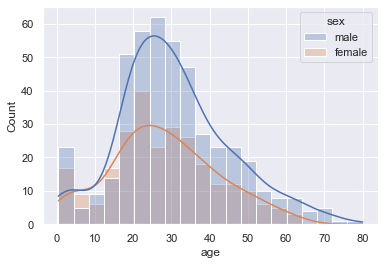

In [49]:
# focus on Age
sns.histplot(data=titanic, x="age", kde=True, hue="sex", alpha=.3) #kde:kernel distribution estimation

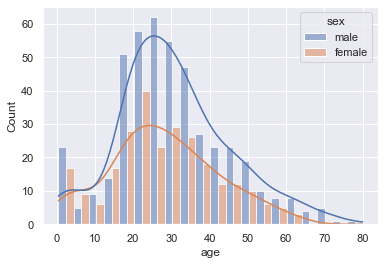

In [50]:
sns.histplot(data=titanic, x="age", kde=True, hue="sex", multiple="dodge")
sns.set_theme()

In [51]:
# talked to a titanic historian (not a real historian)
# this dude says: use median age of corresponding gender to fill in ages

print(f"Number of males {np.sum(titanic['sex'] == 'male')}")
print(f"Number of females {np.sum(titanic['sex'] == 'female')}")

median_male_age = titanic.loc[titanic["sex"] == "male", "age"].median()
median_female_age = titanic.loc[titanic["sex"] == "female", "age"].median()

median_female_age, median_male_age

Number of males 577
Number of females 314


(27.0, 29.0)

In [52]:
titanic.loc[titanic["sex"]=="male", "age"] = titanic.loc[titanic["sex"]=="male", "age"].fillna(median_male_age)
titanic.loc[titanic["age"]==29, "sex"].value_counts()

male      137
female      7
Name: sex, dtype: int64

In [53]:
titanic.isnull().sum()["age"]

53

In [54]:
titanic.loc[titanic["sex"]=="female", "age"]=titanic.loc[titanic["sex"]=="female", "age"].fillna(median_female_age)
titanic.loc[titanic["age"]==27, "sex"].value_counts()

female    59
male      12
Name: sex, dtype: int64

In [55]:
titanic.isnull().sum().age

0

<AxesSubplot:xlabel='age', ylabel='Count'>

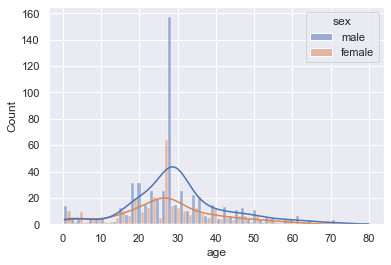

In [56]:
sns.histplot(data=titanic, x="age", kde=True, multiple="dodge", hue="sex", bins=50)